In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('sonar_train.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,1:2]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('sonar_test.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,1:2]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M']
[[ 2.85793366]
 [-0.34810414]
 [ 0.96322882]
 [ 0.1672981 ]
 [ 0.72749875]
 [ 3.03863149]
 [-0.48304188]
 [ 1.09688954]
 [ 1.05877629]
 [ 3.01601833]
 [ 1.20018762]
 [ 2.1247068 ]
 [ 2.1899369 ]
 [ 0.58745489]
 [ 2.94292767]
 [-0.78394795]
 [-0.32983678]
 [ 1.75019588]
 [ 1.72426671]
 [ 1.61783313]
 [-0.14930863]
 [-0.3

In [6]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-20
    for nearest_neighbor in range(1,101):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)
print('accuracy',rel_pre)

knn_algorithm = ball_tree ,nearest_neighbors = 1 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = ball_tree ,nearest_neighbors = 1 ,weight = distance ,accuracy= 0.8048780487804879
knn_algorithm = ball_tree ,nearest_neighbors = 2 ,weight = uniform ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 2 ,weight = distance ,accuracy= 0.8048780487804879
knn_algorithm = ball_tree ,nearest_neighbors = 3 ,weight = uniform ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 3 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = ball_tree ,nearest_neighbors = 4 ,weight = uniform ,accuracy= 0.8536585365853658
knn_algorithm = ball_tree ,nearest_neighbors = 4 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = ball_tree ,nearest_neighbors = 5 ,weight = uniform ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 5 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = ball_tree

knn_algorithm = ball_tree ,nearest_neighbors = 66 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 67 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = ball_tree ,nearest_neighbors = 67 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 68 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = ball_tree ,nearest_neighbors = 68 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 69 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = ball_tree ,nearest_neighbors = 69 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 70 ,weight = uniform ,accuracy= 0.7804878048780488
knn_algorithm = ball_tree ,nearest_neighbors = 70 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = ball_tree ,nearest_neighbors = 71 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm =

knn_algorithm = kd_tree ,nearest_neighbors = 16 ,weight = uniform ,accuracy= 0.7804878048780488
knn_algorithm = kd_tree ,nearest_neighbors = 16 ,weight = distance ,accuracy= 0.9024390243902439
knn_algorithm = kd_tree ,nearest_neighbors = 17 ,weight = uniform ,accuracy= 0.8292682926829268
knn_algorithm = kd_tree ,nearest_neighbors = 17 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 18 ,weight = uniform ,accuracy= 0.8292682926829268
knn_algorithm = kd_tree ,nearest_neighbors = 18 ,weight = distance ,accuracy= 0.9024390243902439
knn_algorithm = kd_tree ,nearest_neighbors = 19 ,weight = uniform ,accuracy= 0.8292682926829268
knn_algorithm = kd_tree ,nearest_neighbors = 19 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 20 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = kd_tree ,nearest_neighbors = 20 ,weight = distance ,accuracy= 0.9024390243902439
knn_algorithm = kd_tree ,nearest_ne

knn_algorithm = kd_tree ,nearest_neighbors = 80 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 81 ,weight = uniform ,accuracy= 0.7804878048780488
knn_algorithm = kd_tree ,nearest_neighbors = 81 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 82 ,weight = uniform ,accuracy= 0.7804878048780488
knn_algorithm = kd_tree ,nearest_neighbors = 82 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 83 ,weight = uniform ,accuracy= 0.7804878048780488
knn_algorithm = kd_tree ,nearest_neighbors = 83 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 84 ,weight = uniform ,accuracy= 0.7804878048780488
knn_algorithm = kd_tree ,nearest_neighbors = 84 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = kd_tree ,nearest_neighbors = 85 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = kd_tree ,nearest_ne

knn_algorithm = brute ,nearest_neighbors = 46 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 46 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 47 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 47 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 48 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 48 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 49 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 49 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 50 ,weight = uniform ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 50 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 51 ,weight =

knn_algorithm = brute ,nearest_neighbors = 97 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 98 ,weight = uniform ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 98 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 99 ,weight = uniform ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 99 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 100 ,weight = uniform ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 100 ,weight = distance ,accuracy= 0.8780487804878049
rel_knn_algorithm： brute
rel_weight： uniform
rel_nearest_neighbor： 95
accuracy 0.9024390243902439


In [12]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1
x = []
y = []
#nearest_neighbor参数范围为1-20
for nearest_neighbor in range(1,101):
    clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights='distance', algorithm='brute')
    clf = clf.fit(train_features, train_labels)

    pre = clf.predict(test_features)
    accuracy = np.sum(pre == test_labels) / pre.shape[0]
    x.append(nearest_neighbor)
    y.append(accuracy)
    print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
    if accuracy >= rel_pre:
        rel_pre = accuracy
        rel_nearest_neighbor = nearest_neighbor

print('rel_nearest_neighbor：',rel_nearest_neighbor)
print('accuracy',rel_pre)

knn_algorithm = brute ,nearest_neighbors = 1 ,weight = distance ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 2 ,weight = distance ,accuracy= 0.8048780487804879
knn_algorithm = brute ,nearest_neighbors = 3 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = brute ,nearest_neighbors = 4 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = brute ,nearest_neighbors = 5 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = brute ,nearest_neighbors = 6 ,weight = distance ,accuracy= 0.8536585365853658
knn_algorithm = brute ,nearest_neighbors = 7 ,weight = distance ,accuracy= 0.9024390243902439
knn_algorithm = brute ,nearest_neighbors = 8 ,weight = distance ,accuracy= 0.8780487804878049
knn_algorithm = brute ,nearest_neighbors = 9 ,weight = distance ,accuracy= 0.9024390243902439
knn_algorithm = brute ,nearest_neighbors = 10 ,weight = distance ,accuracy= 0.9024390243902439
knn_algorithm = brute ,nearest_neighbors = 11 ,weight = dis

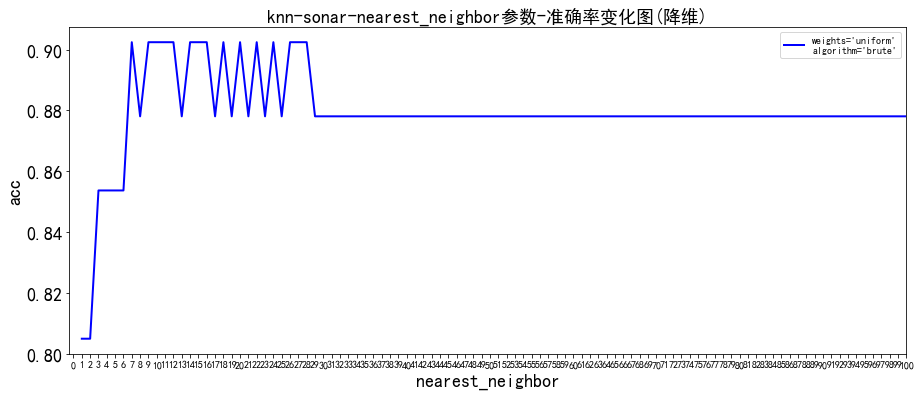

In [11]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,label="weights='uniform'\nalgorithm='brute'")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
# plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("nearest_neighbor",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("knn-sonar-nearest_neighbor参数-准确率变化图(降维)",size=18) #图标题
plt.legend()  # 让图例生效
# # 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,100)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白

plt.savefig("knn-sonar-nearest_neighbor参数选择图（降维）.png") #保存图
plt.show()  #显示图